In [51]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# importing the training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape, test_df.shape

((512087, 11), (36000, 9))

In [4]:
train_df

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


In [5]:
test_df

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007
...,...,...,...,...,...,...,...,...,...
35995,548083,938,600,Software Marketing,Program,1,0,1,0.070
35996,548084,939,600,Software Marketing,Program,1,0,1,0.070
35997,548085,940,600,Software Marketing,Program,1,0,1,0.070
35998,548086,941,600,Software Marketing,Program,1,0,1,0.070


I see here that ID column has a uniquq ID for each entry of the data so first we will drop the ID column from both the dataframes

In [6]:
train_df.drop(['ID'],axis=1, inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

In [7]:
train_df.shape, test_df.shape

((512087, 10), (36000, 8))

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Day_No              512087 non-null  int64  
 1   Course_ID           512087 non-null  int64  
 2   Course_Domain       512087 non-null  object 
 3   Course_Type         512087 non-null  object 
 4   Short_Promotion     512087 non-null  int64  
 5   Public_Holiday      512087 non-null  int64  
 6   Long_Promotion      512087 non-null  int64  
 7   User_Traffic        512087 non-null  int64  
 8   Competition_Metric  510323 non-null  float64
 9   Sales               512087 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 39.1+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day_No              36000 non-null  int64  
 1   Course_ID           36000 non-null  int64  
 2   Course_Domain       36000 non-null  object 
 3   Course_Type         36000 non-null  object 
 4   Short_Promotion     36000 non-null  int64  
 5   Public_Holiday      36000 non-null  int64  
 6   Long_Promotion      36000 non-null  int64  
 7   Competition_Metric  35880 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.2+ MB


I can see that there are missing values in Competition metric and there are two variables extra in the training dataset, one is the target variable and the other is the User Traffic, we will drop the User Traffic from the trainind dataset.

In [11]:
train_df.drop(['User_Traffic'], axis=1, inplace=True)

In [12]:
train_df.shape, test_df.shape

((512087, 9), (36000, 8))

In [13]:
train_df['Competition_Metric'].mean(), train_df['Competition_Metric'].median(), train_df['Competition_Metric'].mode()

(0.07334506577204686,
 0.035,
 0    0.001
 dtype: float64)

In [14]:
train_df['Competition_Metric'].describe()

count    510323.000000
mean          0.073345
std           0.100115
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

Here i will impute the missing values with median of the column

In [16]:
train_df['Competition_Metric'].fillna(train_df['Competition_Metric'].median(),inplace=True)
test_df['Competition_Metric'].fillna(test_df['Competition_Metric'].median(),inplace=True)

In [17]:
train_df.isnull().sum(), test_df.isnull().sum()

(Day_No                0
 Course_ID             0
 Course_Domain         0
 Course_Type           0
 Short_Promotion       0
 Public_Holiday        0
 Long_Promotion        0
 Competition_Metric    0
 Sales                 0
 dtype: int64,
 Day_No                0
 Course_ID             0
 Course_Domain         0
 Course_Type           0
 Short_Promotion       0
 Public_Holiday        0
 Long_Promotion        0
 Competition_Metric    0
 dtype: int64)

The missing values are cleared now.

In [19]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Day_No              512087 non-null  int64  
 1   Course_ID           512087 non-null  int64  
 2   Course_Domain       512087 non-null  object 
 3   Course_Type         512087 non-null  object 
 4   Short_Promotion     512087 non-null  int64  
 5   Public_Holiday      512087 non-null  int64  
 6   Long_Promotion      512087 non-null  int64  
 7   Competition_Metric  512087 non-null  float64
 8   Sales               512087 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 35.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day_No              36000 non-null  int64  
 1   Course_ID        

(None, None)

In both the data sets there are two categorical values Coure Domain and Course Type. We will convert the categorical values into the numerical values.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

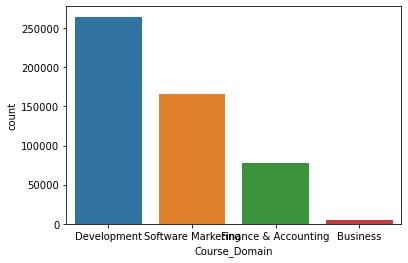

In [21]:
sns.countplot(train_df['Course_Domain'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Course_Type', ylabel='count'>

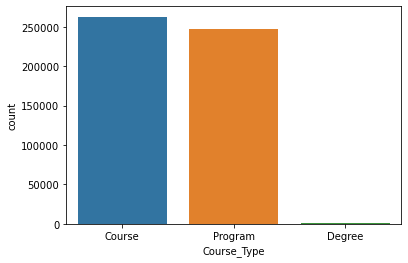

In [22]:
sns.countplot(train_df['Course_Type'])

In [23]:
train_df['Course_Domain'].value_counts(), train_df['Course_Type'].value_counts()

(Development             264295
 Software Marketing      166172
 Finance & Accounting     77210
 Business                  4410
 Name: Course_Domain, dtype: int64,
 Course     262747
 Program    247576
 Degree       1764
 Name: Course_Type, dtype: int64)

In [24]:
train_df.shape

(512087, 9)

In [25]:
train_df_up = pd.get_dummies(train_df,columns=['Course_Domain','Course_Type'],drop_first=True)
test_df_up = pd.get_dummies(test_df,columns=['Course_Domain','Course_Type'], drop_first=True)

In [26]:
train_df_up

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,0,1,1,0.007,81,1,0,0,0,0
1,2,1,0,0,1,0.007,79,1,0,0,0,0
2,3,1,0,0,1,0.007,75,1,0,0,0,0
3,4,1,0,0,1,0.007,80,1,0,0,0,0
4,5,1,0,0,1,0.007,41,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512082,878,600,0,0,1,0.070,114,0,0,1,0,1
512083,879,600,0,0,1,0.070,145,0,0,1,0,1
512084,880,600,0,0,1,0.070,167,0,0,1,0,1
512085,881,600,0,0,1,0.070,107,0,0,1,0,1


In [27]:
train_df.corr()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
Day_No,1.000000,-0.000506,0.014645,0.019112,-0.020204,0.003188,0.060012
Course_ID,-0.000506,1.000000,-0.000027,0.001242,-0.039605,-0.007110,0.016894
Short_Promotion,0.014645,-0.000027,1.000000,-0.018770,-0.001149,0.000180,0.367762
Public_Holiday,0.019112,0.001242,-0.018770,1.000000,0.008319,-0.000483,-0.135052
Long_Promotion,-0.020204,-0.039605,-0.001149,0.008319,1.000000,-0.117862,-0.109455
Competition_Metric,0.003188,-0.007110,0.000180,-0.000483,-0.117862,1.000000,-0.021716
Sales,0.060012,0.016894,0.367762,-0.135052,-0.109455,-0.021716,1.000000


<AxesSubplot:>

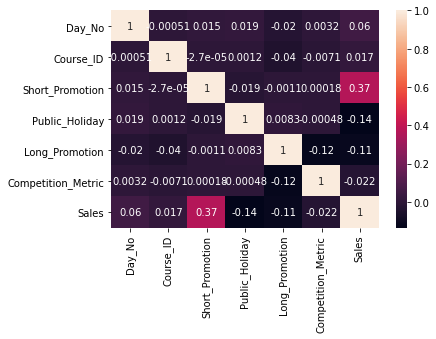

In [28]:
sns.heatmap(train_df.corr(),annot=True)

Day no makes no sense, but if we look the data description closely its the starting of days from first, so we can divide the day data into weekly manner.

In [29]:
train_df_up['Day_No'] = train_df_up['Day_No']%7
# train_df_up

test_df_up['Day_No'] = test_df_up['Day_No']%7
# test_df_up
# test_df_up['Day_No'].value_counts()


Now that we have our dataset ready we will divide the test data into dependent and independent variable

In [30]:
X = train_df_up.drop(['Sales'],axis=1)
Y = train_df_up['Sales']

In [31]:
X.shape, test_df_up.shape, Y.shape

((512087, 11), (36000, 11), (512087,))

Now we will divide our data into training and testing data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=99)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((409669, 11), (102418, 11), (409669,), (102418,))

#### Models

### Linear Regression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(x_test)

In [37]:
y_pred

array([148.7958144 , 153.8879887 , 101.48545205, ...,  85.93759145,
       122.02977606,  88.74509323])

In [38]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
197841,106,148.795814
473109,307,153.887989
363458,159,101.485452
142211,100,135.312402
487286,168,148.726554
...,...,...
293705,180,132.463994
468214,158,151.185263
294123,101,85.937591
91532,99,122.029776


In [39]:
mean_squared_error(y_test,y_pred)

2362.7314953963155

### Random Forest Regressor

In [40]:
rf = RandomForestRegressor()

In [41]:
%%time
rf.fit(x_train,y_train)

Wall time: 1min 32s


RandomForestRegressor()

In [42]:
%%time
y_pred = rf.predict(x_test)

Wall time: 2.2 s


In [43]:
y_pred

array([114.78206898, 293.86111132, 136.64510298, ..., 121.96657349,
       105.39093543,  61.4116994 ])

In [44]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
197841,106,114.782069
473109,307,293.861111
363458,159,136.645103
142211,100,95.337625
487286,168,165.365533
...,...,...
293705,180,172.451283
468214,158,111.359360
294123,101,121.966573
91532,99,105.390935


In [45]:
y_pred_test = rf.predict(test_df_up)

In [46]:
y_pred_test

array([114.71210646, 120.52730113, 100.84988574, ..., 121.66908031,
       121.09370817, 131.24291469])

In [47]:
test_df_ID= pd.read_csv('test.csv')
test_df_ID

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007
...,...,...,...,...,...,...,...,...,...
35995,548083,938,600,Software Marketing,Program,1,0,1,0.070
35996,548084,939,600,Software Marketing,Program,1,0,1,0.070
35997,548085,940,600,Software Marketing,Program,1,0,1,0.070
35998,548086,941,600,Software Marketing,Program,1,0,1,0.070


In [48]:
result = pd.DataFrame({"ID" : test_df_ID['ID'], 'Sales' : y_pred_test})
result

,ID,Sales
0,883,114.712106
1,884,120.527301
2,885,100.849886
3,886,93.273485
4,887,50.961928
...,...,...
35995,548083,151.649293
35996,548084,123.978856
35997,548085,121.669080
35998,548086,121.093708


In [49]:
mean_squared_error(y_test,y_pred)

584.8203992129556

In [50]:
result.to_csv('Submission.csv', index = False)